Link to the COVID-19 Dataset: https://ourworldindata.org/covid-cases

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt 
from prophet import Prophet  # install the prophet package if necessary

#note: you will have to update the data set using the link above every month to observe significant changes in the forecasted values
file = '/Users/michaelonuoha/Downloads/owid-covid-data.csv'  # change the directory to load the data set

covidData = pd.read_csv(file)
covidData = covidData[['location', 'date', 'new_cases', 'new_deaths', 'new_vaccinations']]
covidData.set_index(['location'], inplace = True)
covidData['date'] = pd.to_datetime(covidData['date'])
covidData

Importing plotly failed. Interactive plots will not work.


,date,new_cases,new_deaths,new_vaccinations
location,,,,
Afghanistan,2020-02-24,5.0,NaN,NaN
Afghanistan,2020-02-25,0.0,NaN,NaN
Afghanistan,2020-02-26,0.0,NaN,NaN
Afghanistan,2020-02-27,0.0,NaN,NaN
Afghanistan,2020-02-28,0.0,NaN,NaN
...,...,...,...,...
Zimbabwe,2022-05-20,263.0,2.0,17219.0
Zimbabwe,2022-05-21,0.0,0.0,35059.0
Zimbabwe,2022-05-22,173.0,5.0,23058.0


# Time Series Forecasting of COVID-19 Cases and Deaths

In [2]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.style.use('ggplot')
def covid_over_time(region, var):
    '''This function creates a time series plot of one of the following variables that the user chooses to analyze 
for a particular region: cases, deaths, and vaccinations. 
region: The region on which the user would like to focus 
var: The variable on which the user would like to focus (valid inputs are new_cases, new_deaths & 
new_vaccinations) 
Output: A time series plot along with the table of values'''
    if region not in covidData.index and var not in covidData.columns:
        return "Invalid region and variable entry."
    elif var not in covidData.columns:
        return "Invalid variable entry."
    elif region not in covidData.index:
        return "Invalid region entry."
    covid_nation = covidData.loc[region]
    plt.xticks(rotation = 45)
    plt.xlabel("Date")
    if var == 'new_cases':
        plt.ylabel("Cases")
        plt.title("COVID-19 Cases in {0}".format(region), fontsize = 18)
    elif var == 'new_deaths':
        plt.ylabel("Deaths")
        plt.title("COVID-19 Deaths in {0}".format(region), fontsize = 18)
    elif var == 'new_vaccinations':
        plt.ylabel("Vaccinations")
        plt.title("COVID-19 Vaccinations in {0}".format(region), fontsize = 18)
    plt.plot(covid_nation['date'], covid_nation[var], color = 'b');
    return covid_nation[['date', var]]

In [3]:
def covid_forecasting(region, var, days):
    '''This function forecasts one of the following variables that the user chooses to analyze for a particular 
region: cases, deaths, and vaccinations. 
region: The region on which the user would like to focus 
var: The variable on which the user would like to focus (valid inputs are new_cases, new_deaths & 
new_vaccinations) 
days: The number of days for which the user would like to predict values 
Output: A time series forecast plot along with the table of forecasted values'''
    if region not in covidData.index and var not in covidData.columns:
        return "Invalid region and variable entry."
    elif var not in covidData.columns:
        return "Invalid variable entry."
    elif region not in covidData.index:
        return "Invalid region entry."
    covid_nation = covidData.loc[region]
    targetData = covid_nation[['date', var]].copy()
    targetData.rename(columns = {'date':'ds', var:'y'}, inplace = True)
    forecast = Prophet(daily_seasonality = True)
    forecast.fit(targetData)
    future_values = forecast.make_future_dataframe(periods = days, include_history = False)
    forecast_values = forecast.predict(future_values)
    
    #Negative values for the forecasted values as well as the upper and lower bounds are replaced with zeros because 
    #the number of cases, deaths, and vaccinations cannot be negative 
    invalid_val = [n for n in forecast_values.yhat if n < 0]
    invalid_val_lower = [n for n in forecast_values.yhat_lower if n < 0]
    invalid_val_upper = [n for n in forecast_values.yhat_upper if n < 0]
    forecast_values = forecast_values.replace(invalid_val, [0]*len(invalid_val))
    forecast_values = forecast_values.replace(invalid_val_lower, [0]*len(invalid_val_lower))
    forecast_values = forecast_values.replace(invalid_val_upper, [0]*len(invalid_val_upper))
    
    plt.xticks(rotation = 45)
    plt.xlabel("Date")
    if var == 'new_cases':
        plt.ylabel("Cases")
        plt.title("Forecasted COVID-19 Cases in {0}".format(region), fontsize = 18)
    elif var == 'new_deaths':
        plt.ylabel("Deaths")
        plt.title("Forecasted COVID-19 Deaths in {0}".format(region), fontsize = 18)
    elif var == 'new_vaccinations':
        plt.ylabel("Vaccinations")
        plt.title("Forecasted COVID-19 Vaccinations in {0}".format(region), fontsize = 18)
    plt.plot(covid_nation['date'], covid_nation[var], color = 'b', label = 'Numbers so far')
    plt.plot(forecast_values.ds, forecast_values.yhat, color = 'g', label = 'Forecasted numbers')
    plt.plot(forecast_values.ds, forecast_values.yhat_lower, color = 'r', label = 'Lower bound')
    plt.plot(forecast_values.ds, forecast_values.yhat_upper, color = 'y', label = 'Upper bound')
    plt.legend();
    return forecast_values[['ds','yhat', 'yhat_lower', 'yhat_upper']]

,date,new_cases
location,,
United Kingdom,2020-01-31,2.0
United Kingdom,2020-02-01,0.0
United Kingdom,2020-02-02,0.0
United Kingdom,2020-02-03,6.0
United Kingdom,2020-02-04,0.0
...,...,...
United Kingdom,2022-05-20,6542.0
United Kingdom,2022-05-21,54.0
United Kingdom,2022-05-22,0.0


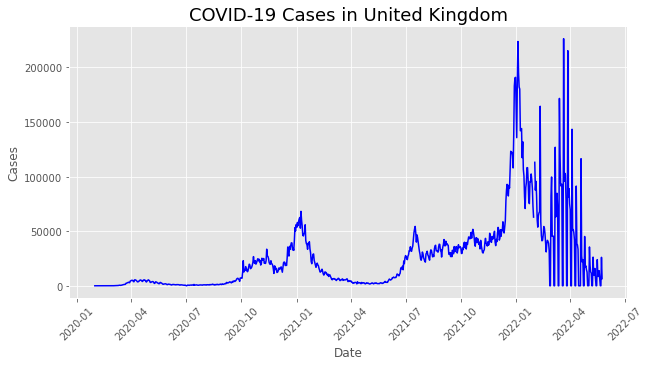

In [4]:
covid_over_time('United Kingdom', 'new_cases')

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


,ds,yhat,yhat_lower,yhat_upper
0,2022-05-25,39789.320856,16109.892875,63877.370462
1,2022-05-26,41922.454260,18706.287349,65918.818203
2,2022-05-27,40425.533382,16007.863198,63436.440218
3,2022-05-28,34646.796555,9696.174094,57961.152887
4,2022-05-29,34157.979136,11663.064550,55811.185195
...,...,...,...,...
360,2023-05-20,42069.030198,16565.013861,70411.842999
361,2023-05-21,41598.595617,13705.215516,70861.718048
362,2023-05-22,53464.504548,26299.880329,80882.080352
363,2023-05-23,51431.856300,26005.864629,78929.844932


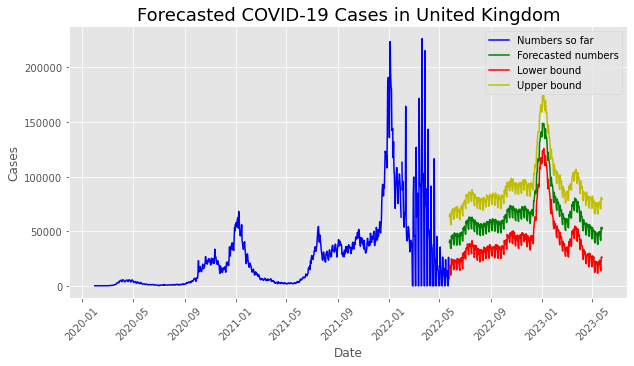

In [5]:
covid_forecasting('United Kingdom', 'new_cases', 365)

,ds,yhat,yhat_lower,yhat_upper
0,2022-05-25,23.139724,0.0,257.188601
1,2022-05-26,0.000000,0.0,209.007539
2,2022-05-27,0.000000,0.0,187.897144
3,2022-05-28,0.000000,0.0,130.154132
4,2022-05-29,0.000000,0.0,54.417486
...,...,...,...,...
360,2023-05-20,0.000000,0.0,129.038301
361,2023-05-21,0.000000,0.0,33.929456
362,2023-05-22,0.000000,0.0,45.531261
363,2023-05-23,0.000000,0.0,221.833665


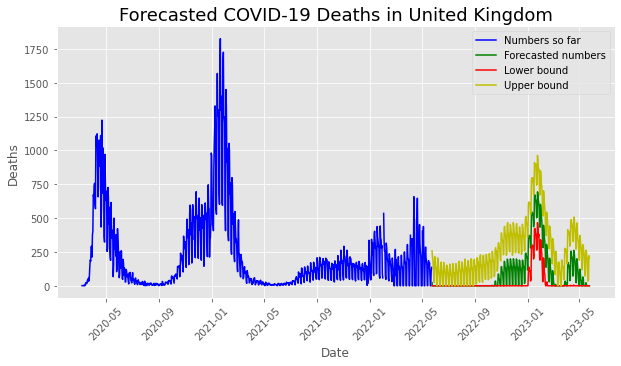

In [6]:
covid_forecasting('United Kingdom', 'new_deaths', 365)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
0,2022-05-25,7410.312551,0.0,210495.755625
1,2022-05-26,27791.737475,0.0,228520.703416
2,2022-05-27,0.000000,0.0,196267.527889
3,2022-05-28,23501.353488,0.0,225848.634801
4,2022-05-29,0.000000,0.0,75347.822529
...,...,...,...,...
360,2023-05-20,0.000000,0.0,0.000000
361,2023-05-21,0.000000,0.0,0.000000
362,2023-05-22,0.000000,0.0,0.000000
363,2023-05-23,0.000000,0.0,0.000000


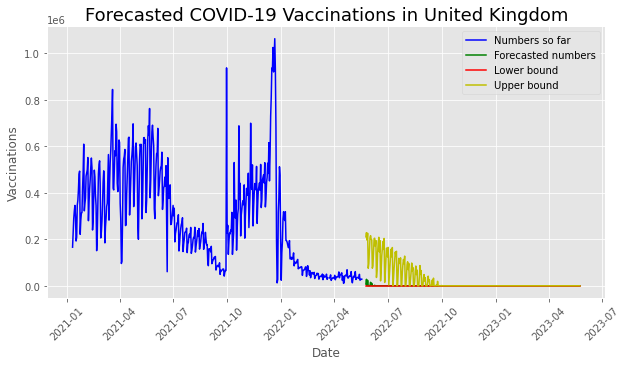

In [7]:
covid_forecasting('United Kingdom', 'new_vaccinations', 365)

In [8]:
help(covid_over_time)

Help on function covid_over_time in module __main__:

covid_over_time(region, var)
    This function creates a time series plot of one of the following variables that the user chooses to analyze 
    for a particular region: cases, deaths, and vaccinations. 
    region: The region on which the user would like to focus 
    var: The variable on which the user would like to focus (valid inputs are new_cases, new_deaths & 
    new_vaccinations) 
    Output: A time series plot along with the table of values



In [9]:
help(covid_forecasting)

Help on function covid_forecasting in module __main__:

covid_forecasting(region, var, days)
    This function forecasts one of the following variables that the user chooses to analyze for a particular 
    region: cases, deaths, and vaccinations. 
    region: The region on which the user would like to focus 
    var: The variable on which the user would like to focus (valid inputs are new_cases, new_deaths & 
    new_vaccinations) 
    days: The number of days for which the user would like to predict values 
    Output: A time series forecast plot along with the table of forecasted values

